In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [29]:
results = pd.read_csv('results.txt', delimiter='\s+', index_col=False)
results['Benchmark'] = results['Benchmark'].str.replace('c.b.j.Summation.', '')
results = results.set_index('Benchmark')
results = results.sort_values('Score')
results

,Mode,Samples,Score,Error,Units
Benchmark,,,,,
sumPrimitive,avgt,200,3.619,±,0.010
sumMutableWrapper,avgt,200,3.650,±,0.014
sumStream,avgt,200,22.794,±,3.123
sumMutableWrapperOptOff,avgt,200,35.794,±,0.255
sumBoxed,avgt,200,39.703,±,0.381
sumEscapedMutableWrapper,avgt,200,40.185,±,0.789


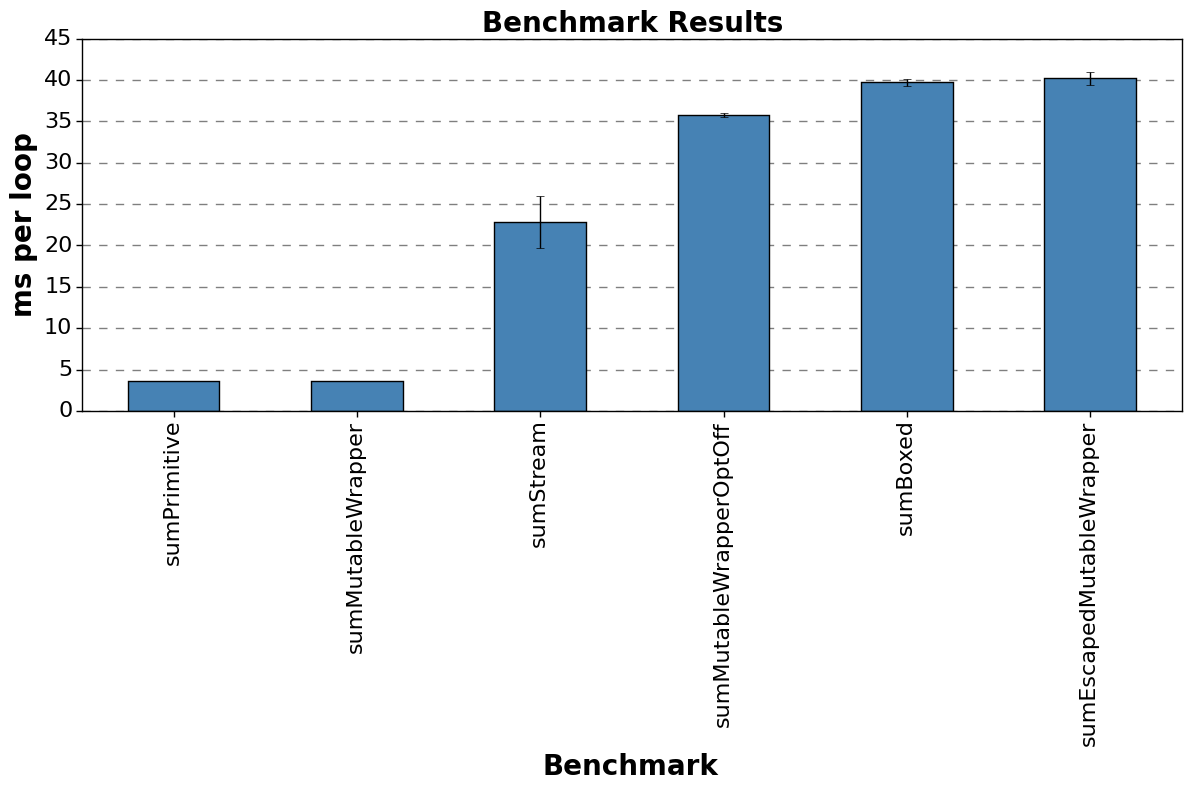

In [123]:
ax = results['Score'].plot(kind='bar', yerr=results['Units'], figsize=(12, 8), color='#4682b4', lw=1)

def prettify_axis(ax, ylabel='', xlabel='', title=''):
    ax.set_axisbelow(True)
    ax.grid(color='k', linestyle='--', linewidth=1, axis='y', alpha=.5, zorder=100)
    label_format_dict = dict(fontsize=20, fontweight='bold')
    tick_format_dict = dict(labelsize=16, direction='out', top='off', right='off', 
                            length=4, width=1)
    ax.set_title(title, label_format_dict)
    ax.set_xlabel(xlabel, label_format_dict)
    ax.set_ylabel(ylabel, label_format_dict)
    ax.tick_params(**tick_format_dict)
    
prettify_axis(ax, ylabel='ms per loop', xlabel='Benchmark', title='Benchmark Results')
plt.tight_layout()
plt.savefig('benchmark_results.png')

In [96]:
stream_results = pd.read_csv('sum_stream_500_iterations.txt', delimiter='\s+', index_col=False, 
                             skiprows=17, nrows=500, header=None)
stream_results = stream_results[2]
stream_results.column = 'ms per loop'

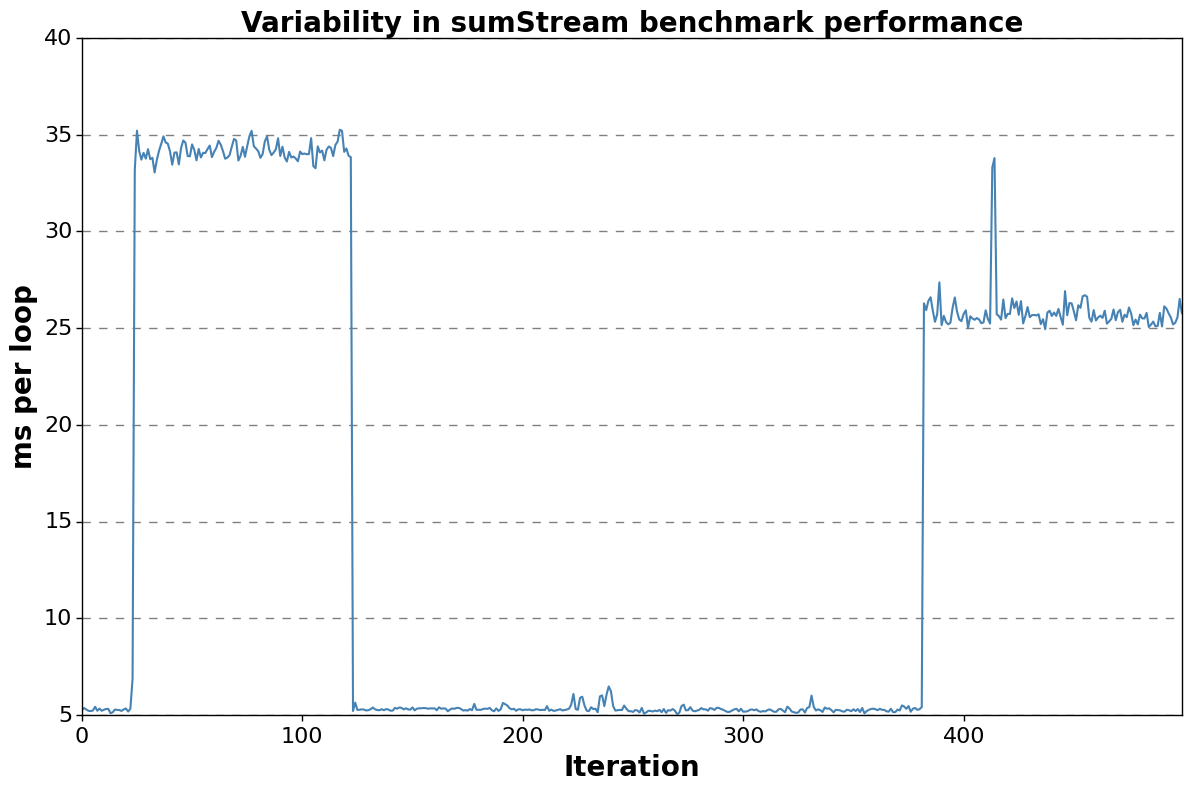

In [124]:
ax = stream_results.plot(figsize=(12, 8), color='#4682b4', lw=1.5)
ax.set_title('Sum stream')
prettify_axis(ax, ylabel='ms per loop', xlabel='Iteration', title='Variability in sumStream benchmark performance')
plt.tight_layout()
plt.savefig('sum_stream_variability.png')

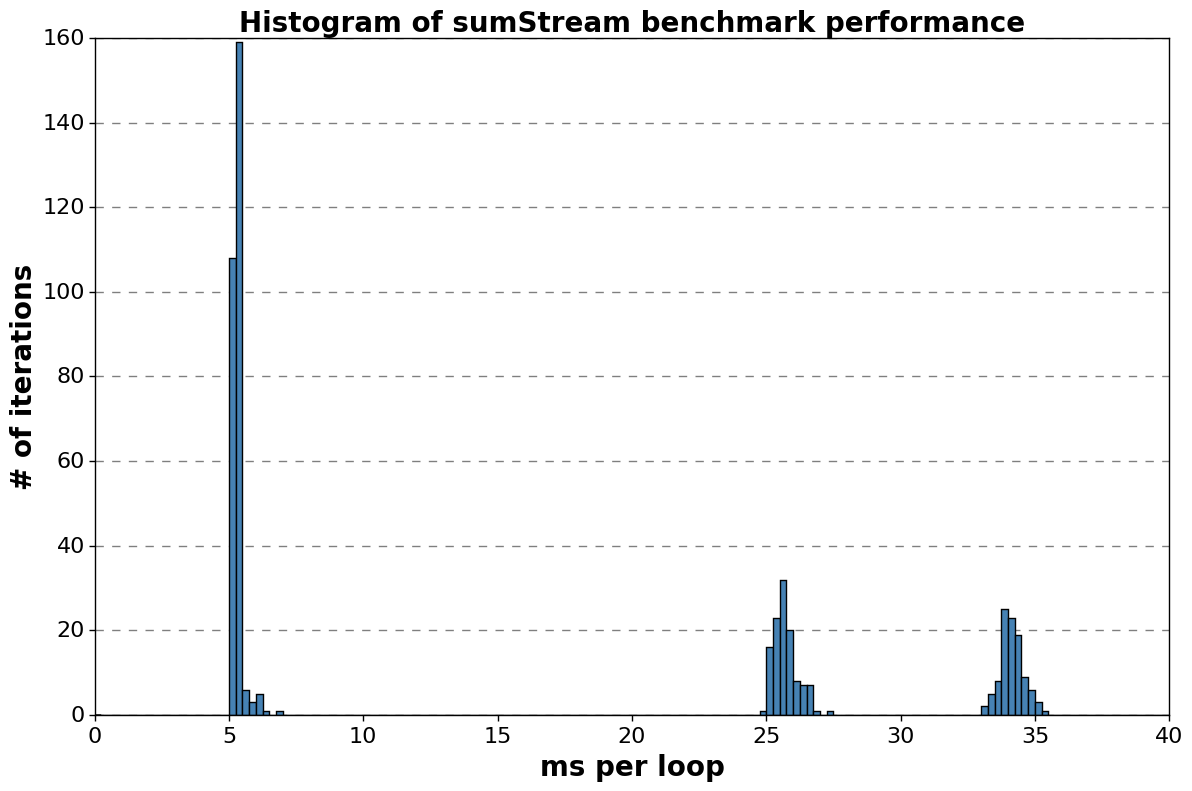

In [126]:
ax = stream_results.plot(kind='hist', range=(0, 40), bins=40 * 4, figsize=(12, 8), color='#4682b4', lw=1)
ax.set_title('Sum stream')
prettify_axis(ax, ylabel='# of iterations', xlabel='ms per loop', title='Histogram of sumStream benchmark performance')
plt.tight_layout()
plt.savefig('sum_stream_variability_histogram.png')

In [127]:
stream_results.describe()

count    500.000000
mean      15.865016
std       12.388681
min        5.045000
25%        5.263500
50%        5.398500
75%       25.999000
max       35.256000
Name: 2, dtype: float64